In [1]:
#importo le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
from sklearn.metrics import silhouette_score
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

In [2]:
#leggo tutti valori senza puntini
pd.set_option('display.max_rows', None)

In [3]:
#importo i dataset
df_BOTH=pd.read_excel('Pentaho2_BOTHSEX.xlsx')
df_MALE=pd.read_excel('Pentaho2_MALE.xlsx')
df_FEMALE=pd.read_excel('Pentaho2_FEMALE.xlsx')

df_BOTH.head(4262)

,Area Code,Luogo,Anno,% poveri +15Y,% GDP a persona,retribuzione oraria media,tipo di occupazione,Genere
0,4,Afghanistan,2014,44.8,-2.2,67.62,Armed forces occupations,BOTHSEX
1,4,Afghanistan,2014,44.8,-2.2,93.61,Technicians and associate professionals,BOTHSEX
2,4,Afghanistan,2014,44.8,-2.2,37.95,"Skilled agricultural, forestry and fishery wor...",BOTHSEX
3,4,Afghanistan,2014,44.8,-2.2,36.22,Craft and related trades workers,BOTHSEX
4,4,Afghanistan,2014,44.8,-2.2,83.86,Professionals,BOTHSEX
5,4,Afghanistan,2014,44.8,-2.2,59.29,"Plant and machine operators, and assemblers",BOTHSEX
6,4,Afghanistan,2014,44.8,-2.2,57.37,Service and sales workers,BOTHSEX
7,4,Afghanistan,2014,44.8,-2.2,37.07,Elementary occupations,BOTHSEX
8,4,Afghanistan,2014,44.8,-2.2,62.28,Not elsewhere classified,BOTHSEX
9,4,Afghanistan,2014,44.8,-2.2,82.04,Clerical support workers,BOTHSEX


In [4]:
#lunghezza dei df
len(df_BOTH)

4262

In [5]:
len(df_MALE)

3961

In [6]:
len(df_FEMALE)

3790

In [7]:
#vedo i nulli -> NON CI SONO VALORI NULLI
df_BOTH.isnull().sum()

Area Code                    0
Luogo                        0
Anno                         0
% poveri +15Y                0
% GDP a persona              0
retribuzione oraria media    0
tipo di occupazione          0
Genere                       0
dtype: int64

In [8]:
#visualizzo quante righe ci sono per nazione
df_BOTH["Luogo"].value_counts()

Paraguay                            190
Peru                                190
Mauritius                           178
Honduras                            155
Philippines                         149
Türkiye                             144
Argentina                           140
Viet Nam                            136
Cambodia                            130
Mongolia                            127
Bosnia and Herzegovina              124
Pakistan                            120
Indonesia                           120
Panama                              118
Egypt                               118
Mexico                              113
Costa Rica                          110
El Salvador                         100
South Africa                         99
Republic of Korea                    96
Sri Lanka                            92
Malaysia                             90
Brazil                               90
Serbia                               84
Armenia                              74


In [9]:
#visualizzo quanti anni ci sono per nazione dal più frequente al meno
df_BOTH["Anno"].value_counts(sort=False)

2014    338
2020    242
2018    343
2004     61
2005     92
2006    144
2008    158
2009    196
2010    198
2011    208
2012    253
2013    295
2017    389
2019    400
2015    290
2016    287
2007    132
2000     22
2001     62
2021     29
2002     53
2003     70
Name: Anno, dtype: int64

In [10]:
#si tolgono gli anni prima del 2011 e il 2021
df_BOTH.drop(df_BOTH[df_BOTH.Anno < 2011].index, inplace=True)
df_BOTH.drop(df_BOTH[df_BOTH.Anno == 2021].index, inplace=True)

In [11]:
#conteggio delle occupazioni più frequenti
df_BOTH["tipo di occupazione"].value_counts()

Elementary occupations                                313
Professionals                                         312
Service and sales workers                             311
Clerical support workers                              311
Craft and related trades workers                      310
Plant and machine operators, and assemblers           310
Skilled agricultural, forestry and fishery workers    306
Managers                                              305
Technicians and associate professionals               303
Armed forces occupations                              176
Not elsewhere classified                               88
Name: tipo di occupazione, dtype: int64

In [12]:
len(df_BOTH)

3045

In [13]:
#rinomino la colonna "tipo di occupazione"
df_BOTH.rename({"tipo di occupazione": "occupazione"}, axis="columns", inplace=True)

In [14]:
#consideriamo solo le occupazione di tipo "Elementary occupations"
df_BOTH.drop(df_BOTH[df_BOTH.occupazione != "Elementary occupations"].index, inplace=True)

In [15]:
#visualizzo ogni luogo per anni disponibili 
df_BOTH = df_BOTH.groupby(["Area Code", "Luogo", "Anno", "% poveri +15Y", "% GDP a persona", "retribuzione oraria media", "occupazione", "Genere"], dropna=False, as_index=False).size()
df_BOTH

,Area Code,Luogo,Anno,% poveri +15Y,% GDP a persona,retribuzione oraria media,occupazione,Genere,size
0,4,Afghanistan,2014,44.8,-2.2,37.07,Elementary occupations,BOTHSEX,1
1,4,Afghanistan,2020,37.1,8.7,52.01,Elementary occupations,BOTHSEX,1
2,8,Albania,2018,0.4,0.0,189.00,Elementary occupations,BOTHSEX,1
3,32,Argentina,2011,0.4,3.2,12.09,Elementary occupations,BOTHSEX,1
4,32,Argentina,2012,0.4,-1.8,16.18,Elementary occupations,BOTHSEX,1
5,32,Argentina,2013,0.3,1.7,20.44,Elementary occupations,BOTHSEX,1
6,32,Argentina,2014,0.3,-2.7,27.40,Elementary occupations,BOTHSEX,1
7,32,Argentina,2017,0.3,2.2,67.24,Elementary occupations,BOTHSEX,1
8,32,Argentina,2018,0.4,-4.1,82.00,Elementary occupations,BOTHSEX,1
9,32,Argentina,2019,0.5,-3.7,110.61,Elementary occupations,BOTHSEX,1


In [16]:
#rimuovo la colonna "size"
df_BOTH.drop(["size"], axis=1, inplace=True)

In [17]:
df_BOTH["Anno"].value_counts(sort=False)

2014    35
2020    25
2018    35
2011    21
2012    26
2013    30
2017    40
2019    41
2015    30
2016    30
Name: Anno, dtype: int64

In [18]:
df_BOTH["Luogo"].value_counts()

Malaysia                            10
Costa Rica                          10
Mongolia                            10
Panama                              10
Republic of Korea                   10
Peru                                10
Viet Nam                            10
Türkiye                             10
Mauritius                            9
Paraguay                             9
Philippines                          9
Honduras                             9
El Salvador                          9
Brazil                               9
Egypt                                9
Mexico                               8
Armenia                              8
Pakistan                             8
Sri Lanka                            8
Argentina                            8
Serbia                               7
Bosnia and Herzegovina               7
Cambodia                             7
Indonesia                            7
Mali                                 6
Dominican Republic       

In [19]:
#df_BOTH[df_BOTH["Luogo"] =="Montenegro"].head(21)

In [20]:
#si eliminano quei Paesi che hanno un numero di valori inferiore a 6 
value_counts  = df_BOTH["Luogo"].value_counts()

# Select the values where the count is less than 6
to_remove = value_counts[value_counts > 2].index

# Keep rows where the Luogo column is not in to_remove
df_BOTH = df_BOTH[df_BOTH.Luogo.isin(to_remove)]

In [21]:
len(df_BOTH)

264

In [22]:
df_BOTH["Luogo"].value_counts()

Viet Nam                  10
Panama                    10
Mongolia                  10
Türkiye                   10
Malaysia                  10
Republic of Korea         10
Costa Rica                10
Peru                      10
Honduras                   9
Mauritius                  9
Philippines                9
Paraguay                   9
El Salvador                9
Egypt                      9
Brazil                     9
Armenia                    8
Sri Lanka                  8
Mexico                     8
Pakistan                   8
Argentina                  8
Serbia                     7
Indonesia                  7
Cambodia                   7
Bosnia and Herzegovina     7
State of Palestine         6
Dominican Republic         6
Thailand                   6
Mali                       6
Jordan                     4
Jamaica                    4
Chile                      4
Myanmar                    4
Belize                     4
India                      3
Ghana         

In [23]:
#aggiungo le righe mancanti con nome della nazione ed anno mancante
df_BOTH=df_BOTH.append({'Area Code': 608, 'Luogo' : 'Philippines' , 'Anno' : 2016, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 600, 'Luogo' : 'Paraguay' , 'Anno' : 2020, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 818, 'Luogo' : 'Egypt' , 'Anno' : 2014, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 340, 'Luogo' : 'Honduras' , 'Anno' : 2020, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 76, 'Luogo' : 'Brazil' , 'Anno' : 2011, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 222, 'Luogo' : 'El Salvador' , 'Anno' : 2020, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 480, 'Luogo' : 'Mauritius' , 'Anno' : 2020, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 586, 'Luogo' : 'Pakistan' , 'Anno' : 2012, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 586, 'Luogo' : 'Pakistan' , 'Anno' : 2020,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 32, 'Luogo' : 'Argentina' , 'Anno' : 2015, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 32, 'Luogo' : 'Argentina' , 'Anno' : 2016,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 484, 'Luogo' : 'Mexico' , 'Anno' : 2011,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 484, 'Luogo' : 'Mexico' , 'Anno' : 2012,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 51, 'Luogo' : 'Armenia' , 'Anno' : 2011, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 51, 'Luogo' : 'Armenia' , 'Anno' : 2012, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 144, 'Luogo' : 'Sri Lanka' , 'Anno' : 2012,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 144, 'Luogo' : 'Sri Lanka' , 'Anno' : 2020, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 360, 'Luogo' : 'Indonesia' , 'Anno' : 2011, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 360, 'Luogo' : 'Indonesia' , 'Anno' : 2016, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 360, 'Luogo' : 'Indonesia' , 'Anno' : 2018, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 688, 'Luogo' : 'Serbia' , 'Anno' : 2011,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 688, 'Luogo' : 'Serbia' , 'Anno' : 2012,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 688, 'Luogo' : 'Serbia' , 'Anno' : 2013,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 116, 'Luogo' : 'Cambodia' , 'Anno' : 2017,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 116, 'Luogo' : 'Cambodia' , 'Anno' : 2018,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 116, 'Luogo' : 'Cambodia' , 'Anno' : 2020, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 70, 'Luogo' : 'Bosnia and Herzegovina' , 'Anno' : 2017,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 70, 'Luogo' : 'Bosnia and Herzegovina' , 'Anno' : 2018,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 70, 'Luogo' : 'Bosnia and Herzegovina' , 'Anno' : 2019,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 275, 'Luogo' : 'State of Palestine' , 'Anno' : 2011,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 275, 'Luogo' : 'State of Palestine' , 'Anno' : 2012, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 275, 'Luogo' : 'State of Palestine' , 'Anno' : 2013,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 275, 'Luogo' : 'State of Palestine' , 'Anno' : 2014,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 214, 'Luogo' : 'Dominican Republic' , 'Anno' : 2011,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 214, 'Luogo' : 'Dominican Republic' , 'Anno' : 2012, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 214, 'Luogo' : 'Dominican Republic' , 'Anno' : 2013, '% poveri +15Y': np.nan,'% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 214, 'Luogo' : 'Dominican Republic' , 'Anno' : 2014,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 764, 'Luogo' : 'Thailand' , 'Anno' : 2011,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 764, 'Luogo' : 'Thailand' , 'Anno' : 2012,'% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 764, 'Luogo' : 'Thailand' , 'Anno' : 2013, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 764, 'Luogo' : 'Thailand' , 'Anno' : 2015, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 466, 'Luogo' : 'Mali' , 'Anno' : 2011, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 466, 'Luogo' : 'Mali' , 'Anno' : 2012, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 466, 'Luogo' : 'Mali' , 'Anno' : 2019, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 466, 'Luogo' : 'Mali' , 'Anno' : 2020, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)

df_BOTH=df_BOTH.append({'Area Code': 104, 'Luogo' : 'Myanmar' , 'Anno' : 2011, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 104, 'Luogo' : 'Myanmar' , 'Anno' : 2012, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 104, 'Luogo' : 'Myanmar' , 'Anno' : 2013, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 104, 'Luogo' : 'Myanmar' , 'Anno' : 2014, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 104, 'Luogo' : 'Myanmar' , 'Anno' : 2016, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 104, 'Luogo' : 'Myanmar' , 'Anno' : 2020, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)

df_BOTH=df_BOTH.append({'Area Code': 388, 'Luogo' : 'Jamaica' , 'Anno' : 2015, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 388, 'Luogo' : 'Jamaica' , 'Anno' : 2016, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 388, 'Luogo' : 'Jamaica' , 'Anno' : 2017, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 388, 'Luogo' : 'Jamaica' , 'Anno' : 2018, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 388, 'Luogo' : 'Jamaica' , 'Anno' : 2019, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 388, 'Luogo' : 'Jamaica' , 'Anno' : 2020, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)

df_BOTH=df_BOTH.append({'Area Code': 84, 'Luogo' : 'Belize' , 'Anno' : 2011, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 84, 'Luogo' : 'Belize' , 'Anno' : 2012, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 84, 'Luogo' : 'Belize' , 'Anno' : 2013, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 84, 'Luogo' : 'Belize' , 'Anno' : 2014, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 84, 'Luogo' : 'Belize' , 'Anno' : 2015, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 84, 'Luogo' : 'Belize' , 'Anno' : 2016, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)

df_BOTH=df_BOTH.append({'Area Code': 152, 'Luogo' : 'Chile' , 'Anno' : 2012, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 152, 'Luogo' : 'Chile' , 'Anno' : 2014, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 152, 'Luogo' : 'Chile' , 'Anno' : 2015, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 152, 'Luogo' : 'Chile' , 'Anno' : 2017, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 152, 'Luogo' : 'Chile' , 'Anno' : 2018, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 152, 'Luogo' : 'Chile' , 'Anno' : 2020, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)

df_BOTH=df_BOTH.append({'Area Code': 400, 'Luogo' : 'Jordan' , 'Anno' : 2011, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 400, 'Luogo' : 'Jordan' , 'Anno' : 2012, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 400, 'Luogo' : 'Jordan' , 'Anno' : 2013, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 400, 'Luogo' : 'Jordan' , 'Anno' : 2014, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 400, 'Luogo' : 'Jordan' , 'Anno' : 2015, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 400, 'Luogo' : 'Jordan' , 'Anno' : 2016, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)

df_BOTH=df_BOTH.append({'Area Code': 894, 'Luogo' : 'Zambia' , 'Anno' : 2011, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 894, 'Luogo' : 'Zambia' , 'Anno' : 2012, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 894, 'Luogo' : 'Zambia' , 'Anno' : 2013, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 894, 'Luogo' : 'Zambia' , 'Anno' : 2014, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 894, 'Luogo' : 'Zambia' , 'Anno' : 2015, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 894, 'Luogo' : 'Zambia' , 'Anno' : 2016, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 894, 'Luogo' : 'Zambia' , 'Anno' : 2020, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)

df_BOTH=df_BOTH.append({'Area Code': 356, 'Luogo' : 'India' , 'Anno' : 2011, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 356, 'Luogo' : 'India' , 'Anno' : 2012, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 356, 'Luogo' : 'India' , 'Anno' : 2013, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 356, 'Luogo' : 'India' , 'Anno' : 2014, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 356, 'Luogo' : 'India' , 'Anno' : 2015, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 356, 'Luogo' : 'India' , 'Anno' : 2016, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 356, 'Luogo' : 'India' , 'Anno' : 2017, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)

df_BOTH=df_BOTH.append({'Area Code': 288, 'Luogo' : 'Ghana' , 'Anno' : 2011, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 288, 'Luogo' : 'Ghana' , 'Anno' : 2012, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 288, 'Luogo' : 'Ghana' , 'Anno' : 2014, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 288, 'Luogo' : 'Ghana' , 'Anno' : 2016, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 288, 'Luogo' : 'Ghana' , 'Anno' : 2018, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 288, 'Luogo' : 'Ghana' , 'Anno' : 2019, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)
df_BOTH=df_BOTH.append({'Area Code': 288, 'Luogo' : 'Ghana' , 'Anno' : 2020, '% poveri +15Y': np.nan, '% GDP a persona' : np.nan, "retribuzione oraria media" : np.nan, "occupazione" : "Elementary occupations", "Genere" : "BOTHSEX"} , ignore_index=True)






In [24]:
df_BOTH[df_BOTH["Luogo"] =="Brazil"].head(10)

,Area Code,Luogo,Anno,% poveri +15Y,% GDP a persona,retribuzione oraria media,occupazione,Genere
23,76,Brazil,2012,1.5,1.1,4.58,Elementary occupations,BOTHSEX
24,76,Brazil,2013,0.9,1.5,4.85,Elementary occupations,BOTHSEX
25,76,Brazil,2014,0.8,-1.0,5.24,Elementary occupations,BOTHSEX
26,76,Brazil,2015,1.0,-3.2,5.76,Elementary occupations,BOTHSEX
27,76,Brazil,2016,1.3,-0.8,6.31,Elementary occupations,BOTHSEX
28,76,Brazil,2017,1.7,1.0,6.83,Elementary occupations,BOTHSEX
29,76,Brazil,2018,1.8,0.2,7.22,Elementary occupations,BOTHSEX
30,76,Brazil,2019,2.0,-0.8,7.41,Elementary occupations,BOTHSEX
31,76,Brazil,2020,2.1,5.8,8.28,Elementary occupations,BOTHSEX
268,76,Brazil,2011,NaN,NaN,NaN,Elementary occupations,BOTHSEX


In [25]:
len(df_BOTH)

360

In [26]:
df_BOTH.head(282)

,Area Code,Luogo,Anno,% poveri +15Y,% GDP a persona,retribuzione oraria media,occupazione,Genere
0,32,Argentina,2011,0.4,3.2,12.09,Elementary occupations,BOTHSEX
1,32,Argentina,2012,0.4,-1.8,16.18,Elementary occupations,BOTHSEX
2,32,Argentina,2013,0.3,1.7,20.44,Elementary occupations,BOTHSEX
3,32,Argentina,2014,0.3,-2.7,27.40,Elementary occupations,BOTHSEX
4,32,Argentina,2017,0.3,2.2,67.24,Elementary occupations,BOTHSEX
5,32,Argentina,2018,0.4,-4.1,82.00,Elementary occupations,BOTHSEX
6,32,Argentina,2019,0.5,-3.7,110.61,Elementary occupations,BOTHSEX
7,32,Argentina,2020,0.6,-2.4,169.53,Elementary occupations,BOTHSEX
8,51,Armenia,2013,1.6,1.2,328.74,Elementary occupations,BOTHSEX
9,51,Armenia,2014,0.6,6.2,436.94,Elementary occupations,BOTHSEX


In [27]:
df_BOTH.rename({"Area Code": "Area_code"}, axis="columns", inplace=True)

In [28]:
#ordinare Area_code e anno crescente
df_BOTH_sort = df_BOTH.sort_values(by=['Area_code', 'Anno'])

In [29]:
df_BOTH_sort['Anno'].value_counts()


2011    36
2012    36
2013    36
2014    36
2015    36
2016    36
2017    36
2018    36
2019    36
2020    36
Name: Anno, dtype: int64

<AxesSubplot: >

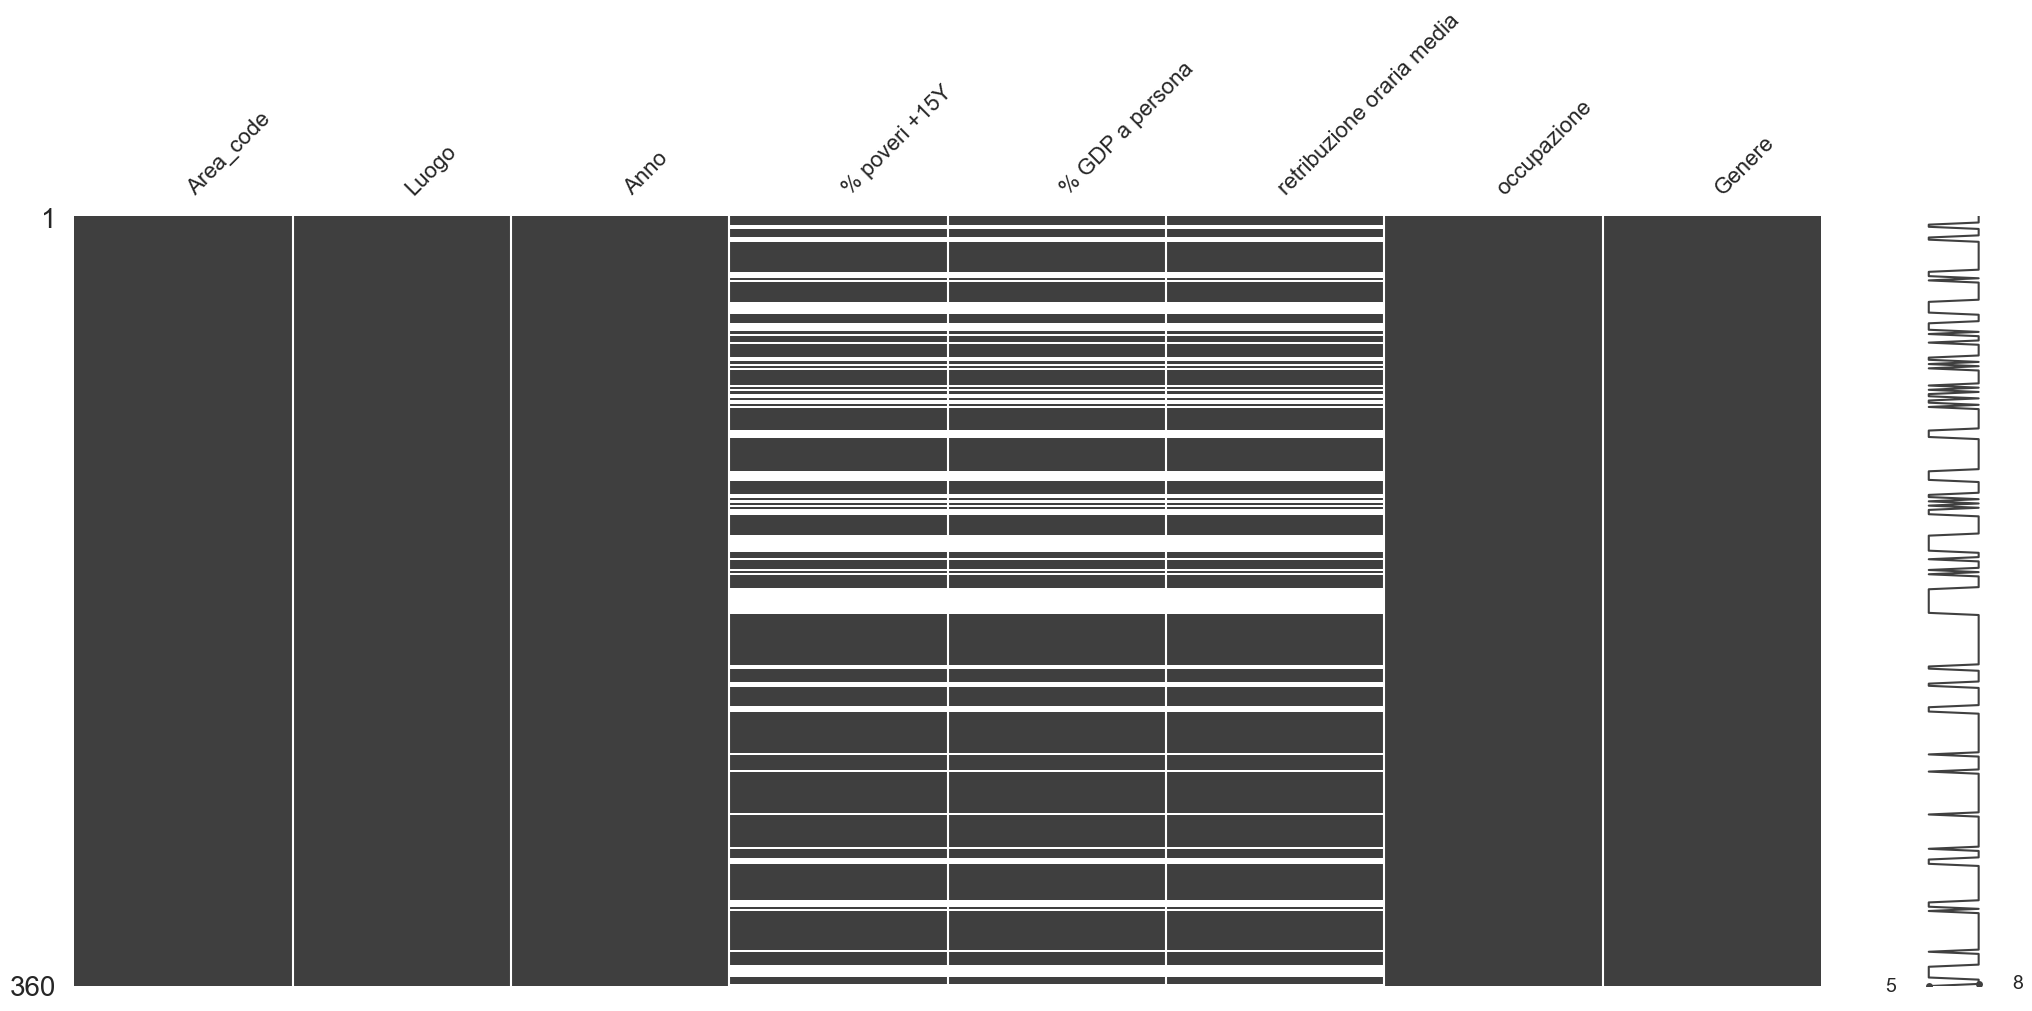

In [30]:
#valori mancanti con righe vuote e non i valori mancanti con righe nere
import missingno as msno

msno.matrix(df_BOTH_sort)

In [31]:
df_BOTH_sort.head(360)

,Area_code,Luogo,Anno,% poveri +15Y,% GDP a persona,retribuzione oraria media,occupazione,Genere
0,32,Argentina,2011,0.4,3.2,12.09,Elementary occupations,BOTHSEX
1,32,Argentina,2012,0.4,-1.8,16.18,Elementary occupations,BOTHSEX
2,32,Argentina,2013,0.3,1.7,20.44,Elementary occupations,BOTHSEX
3,32,Argentina,2014,0.3,-2.7,27.40,Elementary occupations,BOTHSEX
273,32,Argentina,2015,NaN,NaN,NaN,Elementary occupations,BOTHSEX
274,32,Argentina,2016,NaN,NaN,NaN,Elementary occupations,BOTHSEX
4,32,Argentina,2017,0.3,2.2,67.24,Elementary occupations,BOTHSEX
5,32,Argentina,2018,0.4,-4.1,82.00,Elementary occupations,BOTHSEX
6,32,Argentina,2019,0.5,-3.7,110.61,Elementary occupations,BOTHSEX
7,32,Argentina,2020,0.6,-2.4,169.53,Elementary occupations,BOTHSEX


In [32]:
#prendo tutti i territori
Geo = df_BOTH_sort["Luogo"].unique().tolist()
Geo

['Argentina',
 'Armenia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Belize',
 'Myanmar',
 'Cambodia',
 'Sri Lanka',
 'Chile',
 'Costa Rica',
 'Dominican Republic',
 'El Salvador',
 'State of Palestine',
 'Ghana',
 'Honduras',
 'India',
 'Indonesia',
 'Jamaica',
 'Jordan',
 'Republic of Korea',
 'Malaysia',
 'Mali',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Serbia',
 'Viet Nam',
 'Thailand',
 'Türkiye',
 'Egypt',
 'Zambia']

In [33]:
#https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87
#https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/
#https://www.numpyninja.com/post/interpolation-using-pandas
#https://www.numpyninja.com/post/interpolation-using-pandas


#Interpolazione lineare in entrambe le direzioni (avanti e indietro)
values = ["% poveri +15Y", "% GDP a persona", "retribuzione oraria media"]

#per ogni nazione della lista
for i in range(len(Geo)):
    for k in range(0,3):
        #calcolo la media per l'indicatore in ogni nazione [i] e per tutti gli indicatori [k]
        imp=df_BOTH_sort.loc[df_BOTH_sort.Luogo==Geo[i], values[k]].interpolate(method='linear', limit_direction='both')
        #assegno il valore
        df_BOTH_sort.loc[df_BOTH_sort.Luogo==Geo[i], 
                         values[k]] = df_BOTH_sort.loc[df_BOTH_sort.Luogo==Geo[i], 
                                                       values[k]].fillna(imp)
        k+=1
    i+=1

In [34]:
df_BOTH_sort.head(360)

,Area_code,Luogo,Anno,% poveri +15Y,% GDP a persona,retribuzione oraria media,occupazione,Genere
0,32,Argentina,2011,0.400000,3.200000,12.090000,Elementary occupations,BOTHSEX
1,32,Argentina,2012,0.400000,-1.800000,16.180000,Elementary occupations,BOTHSEX
2,32,Argentina,2013,0.300000,1.700000,20.440000,Elementary occupations,BOTHSEX
3,32,Argentina,2014,0.300000,-2.700000,27.400000,Elementary occupations,BOTHSEX
273,32,Argentina,2015,0.300000,-1.066667,40.680000,Elementary occupations,BOTHSEX
274,32,Argentina,2016,0.300000,0.566667,53.960000,Elementary occupations,BOTHSEX
4,32,Argentina,2017,0.300000,2.200000,67.240000,Elementary occupations,BOTHSEX
5,32,Argentina,2018,0.400000,-4.100000,82.000000,Elementary occupations,BOTHSEX
6,32,Argentina,2019,0.500000,-3.700000,110.610000,Elementary occupations,BOTHSEX
7,32,Argentina,2020,0.600000,-2.400000,169.530000,Elementary occupations,BOTHSEX


In [35]:
len(df_BOTH_sort)

360

In [36]:
df_BOTH_sort.describe()

,Area_code,Anno,% poveri +15Y,% GDP a persona,retribuzione oraria media
count,360.000000,360.000000,360.000000,360.000000,360.000000
mean,397.305556,2015.500000,5.554722,1.940833,1514.331667
std,242.974238,2.876279,11.922172,3.382682,3899.250485
min,32.000000,2011.000000,0.000000,-11.500000,1.050000
25%,179.000000,2013.000000,0.100000,0.200000,7.192500
50%,394.000000,2015.500000,0.900000,2.000000,46.520000
75%,593.250000,2018.000000,4.800000,4.000000,496.297500
max,894.000000,2020.000000,53.900000,11.400000,28058.320000


In [43]:
fig = px.choropleth(df_BOTH_sort,
    locations = "Luogo",
    locationmode = "country names",
    color = "% poveri +15Y",
    animation_frame ='Anno',
    range_color = [0,54],
    color_continuous_scale = "speed",            
    title = "% lavoratori in povertà: 2011-2020")

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
#fig.update_geos(visible=False, resolution=50, scope="world",
    #showcountries=True, countrycolor="Black")
fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, 
                  title="% lavoratori in povertà: 2011-2020")


fig.show()

In [45]:
fig = px.choropleth(df_BOTH_sort,
    locations = "Luogo",
    locationmode = "country names",
    color = "% GDP a persona",
    animation_frame ='Anno',
    range_color = [-11,12],
    color_continuous_scale = "speed",            
    title = "GDP: 2011-2020")

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
#fig.update_geos(visible=False, resolution=50, scope="world",
    #showcountries=True, countrycolor="Black")
fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, 
                  title="% GDP a persona: 2011-2020")


fig.show()

In [39]:
fig = px.choropleth(df_BOTH_sort,
    locations = "Luogo",
    locationmode = "country names",
    color = "retribuzione oraria media",
    animation_frame ='Anno',
    range_color = [1,2800],
    color_continuous_scale = "speed",            
    title = "Retribuzione oraria media: 2011-2020")

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
#fig.update_geos(visible=False, resolution=50, scope="world",
    #showcountries=True, countrycolor="Black")
fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, 
                  title="Retribuzione oraria media: 2011-2020")


fig.show()